In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',50)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import test nd train
train=pd.read_csv(r"C:\Users\Lenovo\Downloads\train_csv2022.csv")
test=pd.read_csv(r"C:\Users\Lenovo\Downloads\test_csv2022.csv")

In [3]:
train.shape,test.shape

((114480, 21), (20203, 20))

In [4]:
train.head(2)

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,3,0,0,0,1,0,33012,0,0,1500,4716
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,9,0,0,0,1,0,74907,1,1,300,24969


## EDA 

In [5]:
combined=pd.concat([train,test],ignore_index=True)

In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134683 entries, 0 to 134682
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Property_ID       134683 non-null  int64  
 1   room              134683 non-null  int64  
 2   layout_type       134683 non-null  object 
 3   property_type     134683 non-null  object 
 4   locality          134683 non-null  object 
 5   area              134683 non-null  int64  
 6   furnish_type      134683 non-null  object 
 7   bathroom          134683 non-null  int64  
 8   city              134683 non-null  object 
 9   parking_spaces    134683 non-null  int64  
 10  floor             134683 non-null  int64  
 11  pet_friendly      134683 non-null  int64  
 12  power_backup      134683 non-null  int64  
 13  washing_machine   134683 non-null  int64  
 14  air_conditioner   134683 non-null  int64  
 15  geyser/solar      134683 non-null  int64  
 16  security_deposit  13

In [7]:
combined.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality',
       'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'security_deposit', 'CCTV/security', 'lift',
       'neighbourhood', 'price'],
      dtype='object')

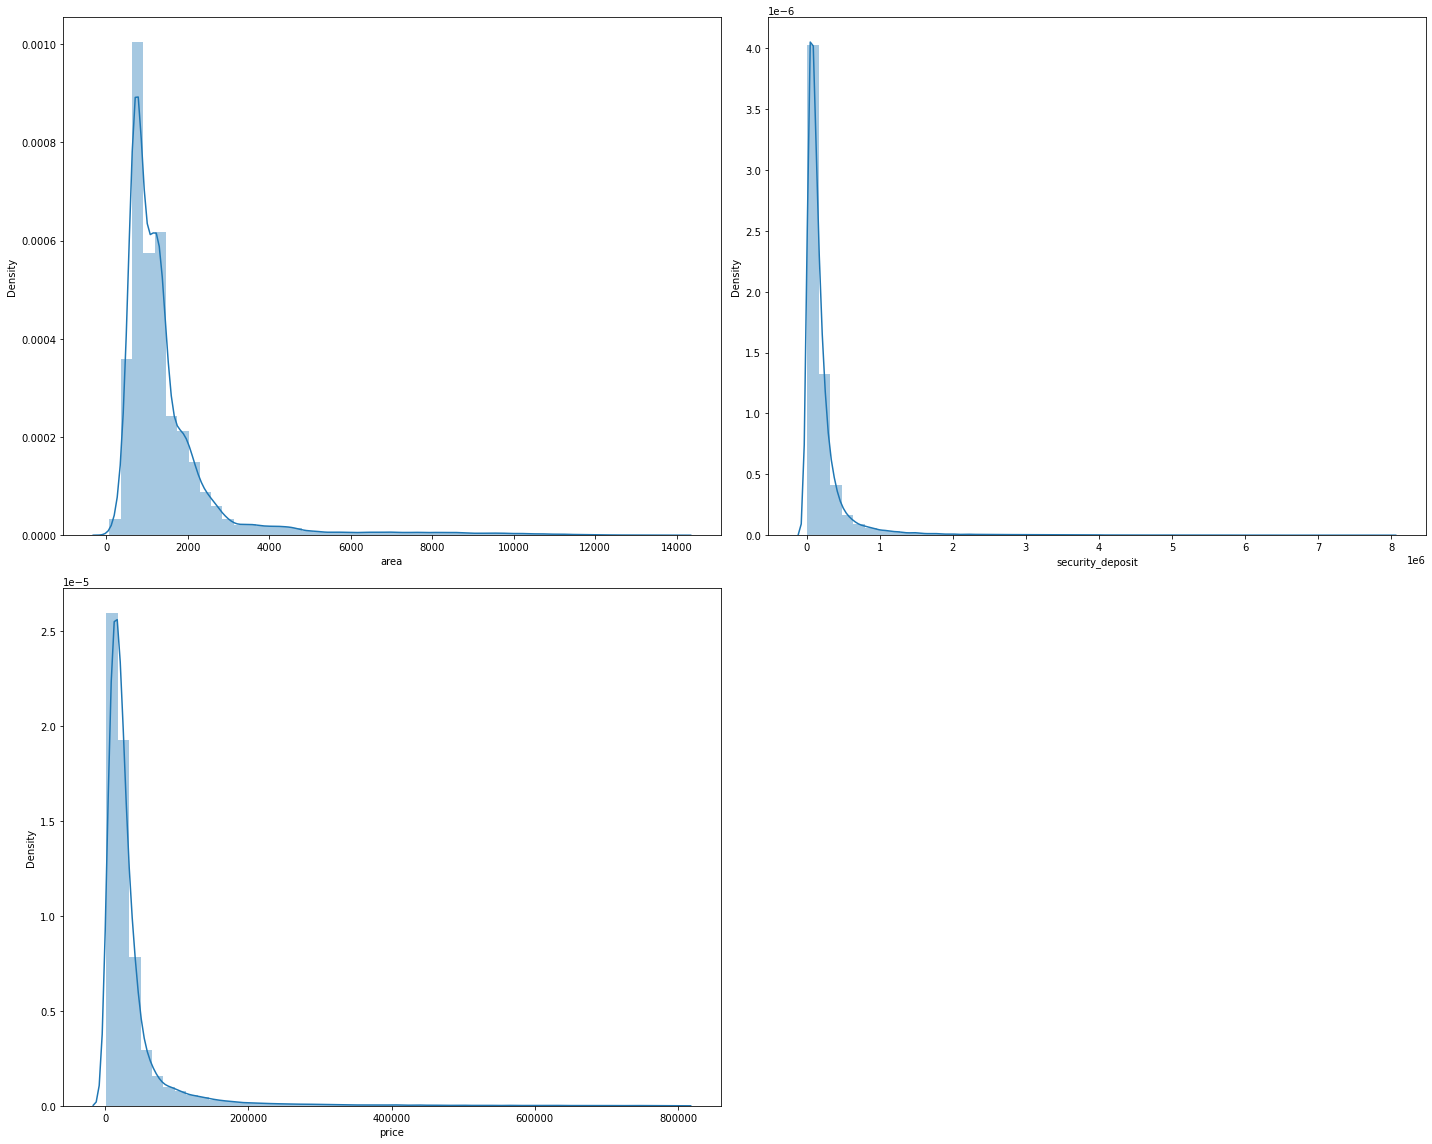

In [8]:
# list of numerical variables
plt.figure(figsize=(20,16))
nums=['area','security_deposit','price']

a=2
b=2
c=1
for i in nums:
    plt.subplot(a,b,c)
    sns.distplot(combined[i])
    c=c+1
    
plt.tight_layout()
plt.show()

#right skewed

In [9]:
#categorical variables
cat=['room','layout_type', 'property_type', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'CCTV/security', 'lift']

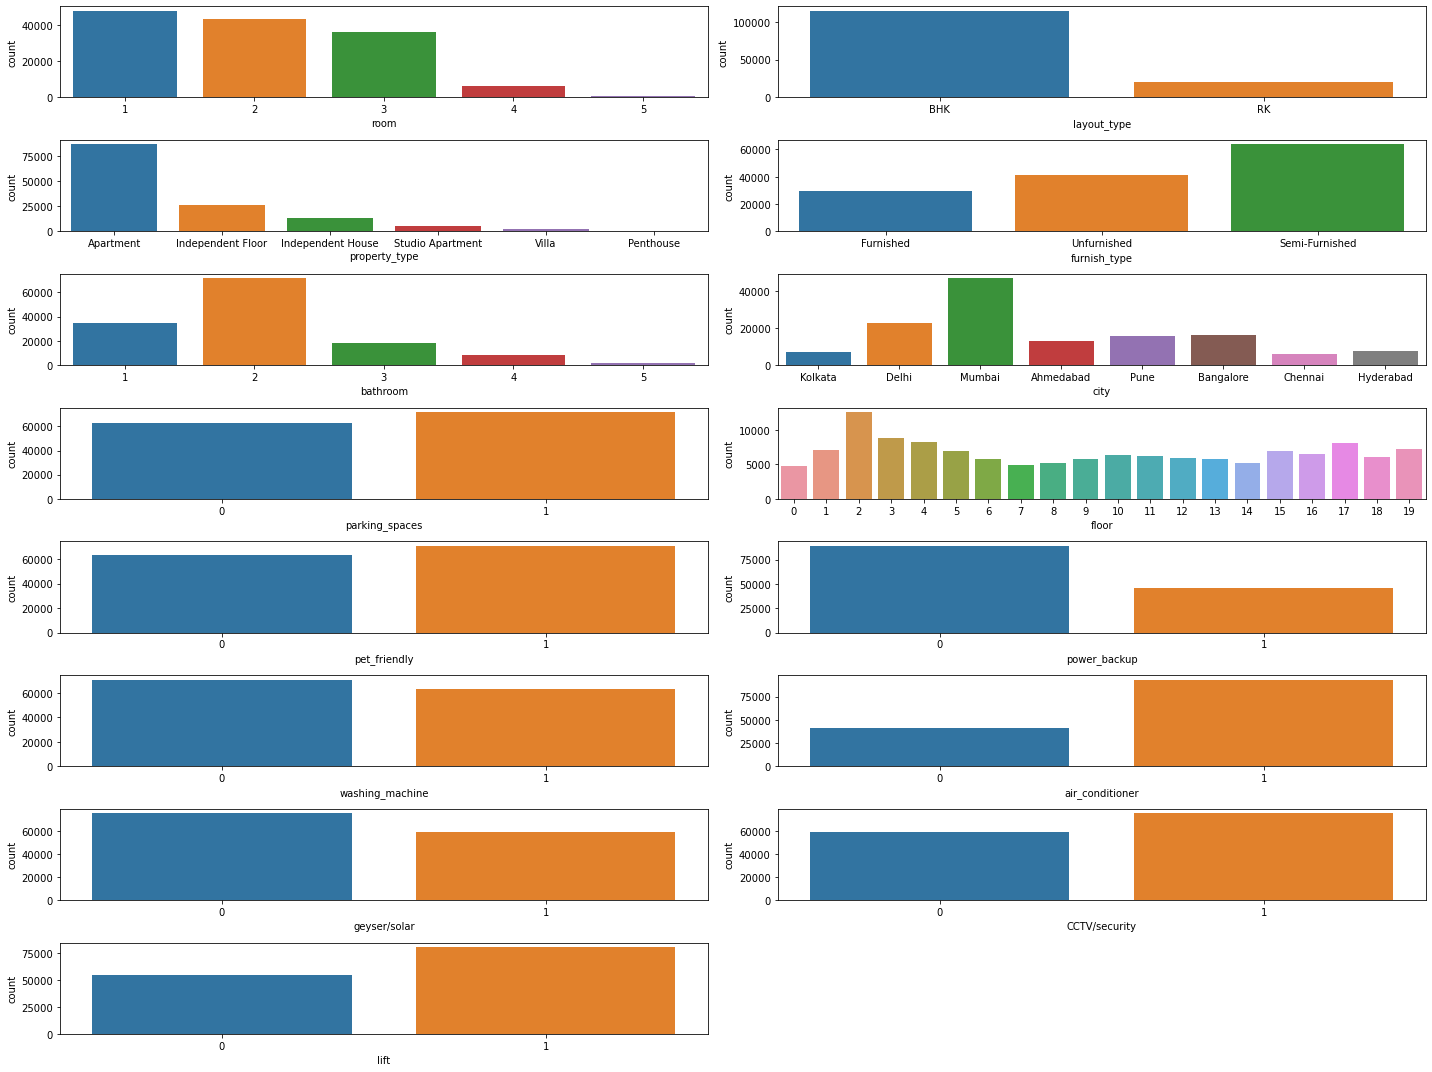

In [10]:
plt.figure(figsize=(20,15))
a=8
b=2
c=1
for i in cat:
    plt.subplot(a,b,c)
    sns.countplot(combined.loc[:,i])
    c=c+1
    
plt.tight_layout()
plt.show()

## Inferences 

1. Most of the house rentals are found in **Mumbai** followed by **Delhi**. 
2. Most of the Properties have **lift** followed by **CCTV and AC**
3. Properties do not have **Geysers** followed by less **Washing Machine** and no **Power back up**. 
4. **Pet Friendly houses exist in the data followed by **Parking Space**. 
5. No of **bathrooms** range from 1-5. 
6. Max **bedrooms** are 5 and there the houses in the data are from 1 BHK to 5 BHK 
7. Most the rental houses are **semi furnished in nature**.
8. The frequency of **apartments** are more than any other type of property in the dataset.
9. People generally prefer **Rentals** on the 2nd floor.

<AxesSubplot:xlabel='security_deposit', ylabel='price'>

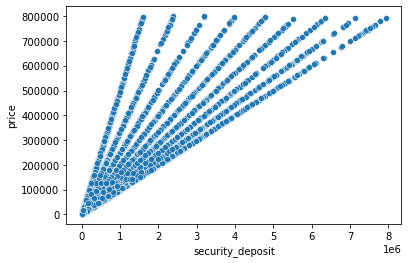

In [11]:
## bivariate
# security deposit vs price
sns.scatterplot(x='security_deposit',y='price',data=combined)

* Heteroscdastic pattern so we cant  go for linear model
* security deposit shows varies a lot with price 

In [12]:
combined.loc[:,['security_deposit','price']].corr()

# variable is very important

,security_deposit,price
security_deposit,1.000000,0.898108
price,0.898108,1.000000


<AxesSubplot:xlabel='area', ylabel='price'>

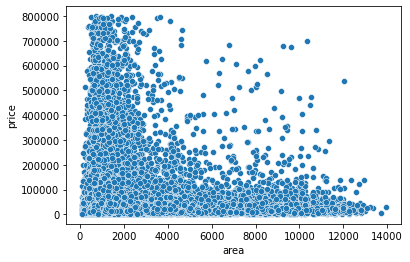

In [13]:
# area vs price
sns.scatterplot(x='area',y='price',data=combined)

In [14]:
# neighbourhood binning
combined['neighbourhood']=combined['neighbourhood']/1000


In [15]:
combined.neighbourhood.describe()

count    134683.000000
mean          2.033024
std           1.159636
min           0.000000
25%           1.100000
50%           2.000000
75%           3.000000
max           4.000000
Name: neighbourhood, dtype: float64

In [16]:
def outcome(x):
    if(x<=1):
        return ('Close Proximity')
    elif(1<x<=2):
        return ('Vicinity')
    elif(2<x<=3):
        return('Nearby')
    else:
        return ('Far')

In [17]:
combined['Neighbour_Dist']=combined.neighbourhood.apply(outcome)

In [18]:
combined.groupby('Neighbour_Dist')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Neighbour_Dist,,,,,,,,
Close Proximity,27237.0,38163.169769,63803.113548,1624.0,12854.00,21952.0,37345.00,795827.0
Far,28400.0,35382.173345,62966.092049,1597.0,11008.75,19427.0,34340.25,799325.0
Nearby,26492.0,36759.282840,62617.498120,1590.0,12117.00,20891.5,35825.25,799123.0
Vicinity,32351.0,36606.056320,61841.869279,1668.0,12181.00,21161.0,36467.00,794823.0


<AxesSubplot:xlabel='Neighbour_Dist', ylabel='price'>

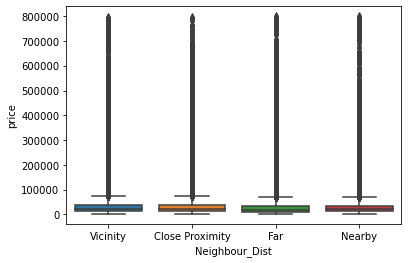

In [19]:
sns.boxplot(y='price',x='Neighbour_Dist',data=combined)

In [20]:
# change data type
combined['parking_spaces']=combined.parking_spaces.astype('object')

combined['floor']=combined.floor.astype('object')

combined['pet_friendly']=combined.pet_friendly.astype('object')

combined['power_backup']=combined.power_backup.astype('object')

combined['washing_machine']=combined.washing_machine.astype('object')

combined['air_conditioner']=combined.air_conditioner.astype('object')

combined['geyser/solar']=combined['geyser/solar'].astype('object')

combined['CCTV/security']=combined['CCTV/security'].astype('object')

combined['lift']=combined.lift.astype('object')

<AxesSubplot:xlabel='room', ylabel='price'>

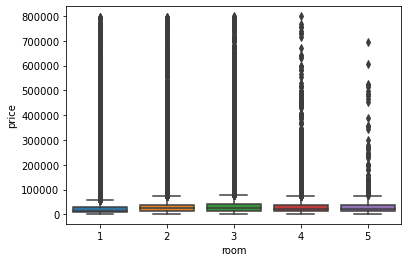

In [21]:
#room vs price
sns.boxplot(x='room',y='price',data=combined)

In [22]:
#bathroom vs price
combined.groupby('bathroom')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
bathroom,,,,,,,,
1,29375.0,29958.473362,62071.197537,1590.0,6787.0,13767.0,26306.00,796196.0
2,60993.0,39175.249324,61388.919179,1597.0,14899.0,23874.0,38877.00,799325.0
3,15698.0,39257.046184,66622.826936,1824.0,13376.0,22543.5,37548.25,796184.0
4,6905.0,37024.058653,64508.609453,1599.0,12302.0,20500.0,35265.00,771600.0
5,1509.0,40436.748840,72388.163742,1953.0,12105.0,21773.0,37031.00,773539.0


In [23]:
#lets convert bathroom and room to object
combined['bathroom']=combined.bathroom.astype('object')


combined['room']=combined.room.astype('object')

In [24]:
# 
combined.layout_type.value_counts()

BHK    114684
RK      19999
Name: layout_type, dtype: int64

In [25]:
#converting RK in to BHK where the room is>1
combined.loc[(combined.layout_type=='RK') & (combined.room>1),'layout_type']='BHK'

In [26]:
# change number of bathroom to 1 in RK type
combined.loc[(combined.layout_type=='RK') & (combined.bathroom>1),'bathroom']='1'

In [27]:
# lets look at locality
combined.locality.nunique()

3706

In [28]:
#map the locality
encoded=train.groupby('locality')['price'].median()

combined['locality']=combined.locality.map(encoded)

In [29]:
#furnish type
furnishedencoded=train.groupby('furnish_type')['price'].median()

combined['Furnish_type']=combined.furnish_type.map(furnishedencoded)

In [30]:
# floor Encoding
combined['floor_encoded']=combined.floor.value_counts()/combined.shape[0]

In [31]:
# floor encoded not working well giving so many null values

In [32]:
# drop the variables
combined.drop(['Property_ID','floor_encoded'],axis=1,inplace=True)

In [33]:
#impute very small values in locality
combined.locality.fillna(-9999,inplace=True)

In [34]:
#floor target encoding
floor_encoded=train.groupby('floor')['price'].median()
combined['floor_encoded']=combined.floor.map(floor_encoded)


In [35]:
combined.isnull().sum()

room                    0
layout_type             0
property_type           0
locality                0
area                    0
furnish_type            0
bathroom                0
city                    0
parking_spaces          0
floor                   0
pet_friendly            0
power_backup            0
washing_machine         0
air_conditioner         0
geyser/solar            0
security_deposit        0
CCTV/security           0
lift                    0
neighbourhood           0
price               20203
Neighbour_Dist          0
Furnish_type            0
floor_encoded           0
dtype: int64

In [36]:
#Replace independent floor with house
combined.replace(to_replace='Independent Floor',value='Independent House',inplace=True)

In [37]:
combined.groupby('property_type')['area'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,86819.0,1500.531635,1402.438179,81.0,773.00,1151.0,1625.0,13942.0
Independent House,39258.0,1465.091395,1433.380669,90.0,748.00,1076.0,1536.0,13079.0
Penthouse,492.0,1410.014228,1488.929455,133.0,721.75,923.0,1419.5,11494.0
Studio Apartment,5723.0,1340.229425,1409.616379,100.0,698.00,842.0,1359.5,12070.0
Villa,2391.0,1350.099958,1391.392933,97.0,702.00,851.0,1388.0,11761.0


In [38]:
# now we will fix property type for rk
combined.loc[combined.layout_type=='RK','property_type'].value_counts()

Apartment            5278
Independent House    3292
Studio Apartment      791
Villa                 289
Penthouse              54
Name: property_type, dtype: int64

In [39]:
## Replacing Villa & penthouse in studio 

combined.loc[(combined.layout_type=="RK") & (combined.property_type=="Penthouse"), "property_type"]="Studio Apartment"

In [40]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134683 entries, 0 to 134682
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   room              134683 non-null  int64  
 1   layout_type       134683 non-null  object 
 2   property_type     134683 non-null  object 
 3   locality          134683 non-null  float64
 4   area              134683 non-null  int64  
 5   furnish_type      134683 non-null  object 
 6   bathroom          134683 non-null  object 
 7   city              134683 non-null  object 
 8   parking_spaces    134683 non-null  int64  
 9   floor             134683 non-null  int64  
 10  pet_friendly      134683 non-null  int64  
 11  power_backup      134683 non-null  int64  
 12  washing_machine   134683 non-null  int64  
 13  air_conditioner   134683 non-null  int64  
 14  geyser/solar      134683 non-null  int64  
 15  security_deposit  134683 non-null  int64  
 16  CCTV/security     13

In [41]:
combined=combined.drop('floor',axis=1)

In [42]:
combined.columns

Index(['room', 'layout_type', 'property_type', 'locality', 'area',
       'furnish_type', 'bathroom', 'city', 'parking_spaces', 'pet_friendly',
       'power_backup', 'washing_machine', 'air_conditioner', 'geyser/solar',
       'security_deposit', 'CCTV/security', 'lift', 'neighbourhood', 'price',
       'Neighbour_Dist', 'Furnish_type', 'floor_encoded'],
      dtype='object')

In [43]:
dummy_data=pd.get_dummies(combined,drop_first=True)

In [44]:
train.shape,test.shape

((114480, 21), (20203, 20))

In [45]:
#splitting
newtrain=dummy_data.loc[0:train.shape[0]-1,:]
newtest=dummy_data.loc[train.shape[0]:,:]

In [46]:
newtrain.shape,newtest.shape

((114480, 38), (20203, 38))

## Statistics and Unsupervised Machine Learning

In [47]:
#num variable
cols=['locality','Furnish_type','area','security_deposit','floor_encoded','neighbourhood']

localdata=newtrain.loc[:,cols]

In [48]:
from yellowbrick.cluster import  KElbowVisualizer

from sklearn.cluster import KMeans

model=KMeans(random_state=42)

visual=KElbowVisualizer(estimator=model,k=(2,10))

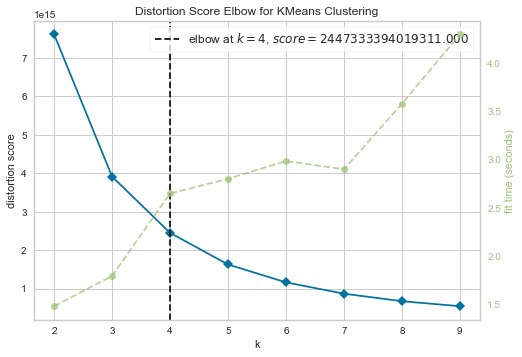

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
visual.fit(localdata)

visual.show()

In [50]:
model=KMeans(n_clusters=4,random_state=42)

In [51]:
newtrain['clusters']=model.fit_predict(localdata)

In [52]:
# checking the significnce with stats of clusters
#Ho: Cluster labels have no significance with target
# Ha: Cluster Labels have significance with target

from statsmodels.formula.api import ols
olsmodel=ols('price~clusters',data=newtrain).fit()


#print annova table

from statsmodels.stats.anova import anova_lm
print(anova_lm(olsmodel))

                df        sum_sq       mean_sq           F  PR(>F)
clusters       1.0  2.464058e+13  2.464058e+13  6613.45662     0.0
Residual  114478.0  4.265249e+14  3.725824e+09         NaN     NaN


In [53]:
# our colusters column is valid to use here as pvalue is less than 0.05

In [54]:
#num variable
cols=['locality','Furnish_type','area','security_deposit','floor_encoded','neighbourhood']

localtest=newtest.loc[:,cols]
kmeans=KMeans(n_clusters=4,random_state=42)

newtest['clusters']=kmeans.fit_predict(localtest)

## Model Building 

1. Base Model-Avg of price



In [55]:
pred=train.price.mean()

In [56]:
submission=pd.DataFrame({'Property_ID':test.Property_ID,'price':pred})

submission.to_csv('Basemodelgl.csv',index=False)

In [57]:
pred1=train.price.median()

In [58]:
submission=pd.DataFrame({'Property_ID':test.Property_ID,'price':pred1})

submission.to_csv('Basemodelgl1.csv',index=False)

In [59]:
# splitting the Data in Train and test
from sklearn.model_selection import train_test_split

X=newtrain.drop('price',axis=1)
y=newtrain.price

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=786,stratify=newtrain['clusters'])

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dtree=DecisionTreeRegressor(max_depth=17,random_state=2)

pred_dtree=dtree.fit(X_train,y_train).predict(X_test)

print("RMSE for {} model is {} :".format('dtree',np.sqrt(mean_squared_error(y_test,pred_dtree))))

RMSE for dtree model is 35419.02622477216 :


In [61]:
pred3=dtree.fit(X_train,y_train).predict(newtest.drop('price',axis=1))

In [62]:
pred3=[x-1 for x in pred3]

In [63]:
submission=pd.DataFrame({'Property_ID':test.Property_ID,'price':pred3})

submission.to_csv('Basemodel89.csv',index=False)

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
rf=RandomForestRegressor()
pred_rf=rf.fit(X,y).predict(newtest.drop('price',axis=1))

In [66]:
submission=pd.DataFrame({'Property_ID':test.Property_ID,'price':pred_rf})

submission.to_csv('Basemodelglrf123.csv',index=False)

In [67]:
#light gbm

from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()

pred_lgbm=lgbm.fit(X,y).predict(newtest.drop('price',axis=1))

In [68]:
submission=pd.DataFrame({'Property_ID':test.Property_ID,'price':pred_lgbm})

submission.to_csv('Basemodelglgbm1.csv',index=False)

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
g=GradientBoostingRegressor()

In [70]:
pred_g=g.fit(X,y).predict(newtest.drop('price',axis=1))

In [71]:
submission=pd.DataFrame({'Property_ID':test.Property_ID,'price':pred_g})

submission.to_csv('Basemodelglg.csv',index=False)

In [72]:
g=GradientBoostingRegressor(n_estimators=50)

In [73]:
pred_g2=g.fit(X,y).predict(newtest.drop('price',axis=1))

In [74]:
submission=pd.DataFrame({'Property_ID':test.Property_ID,'price':pred_g2})

submission.to_csv('Basemodel8.csv',index=False)

In [76]:
from sklearn.model_selection import KFold

kfold=KFold()

In [ ]:
from sklearn.ensemble import StackingRegressor

level_0 =[("rf",rf),('gradient',g)]

stack= StackingRegressor(estimators=level_0, final_estimator=g )
pred_model=pd.DataFrame()

n =10
for i in range(n):
    folds = next(kfold.split(X))
    xtrain = X.iloc[folds[0]]
    ytrain = y.iloc[folds[0]]
    pred_model[i] = stack.fit(X,y).predict(newtest.drop('price',axis=1))

In [ ]:
vals = pred_model.median(axis=1)